### Classification in Business

<center>
    <img src = 'images/uci_biz.png' />
</center>



------------


For this try-it, you are to explore some available datasets related to business applications of classification.  Using a dataset from the UCI Machine Learning Repository, scan datasets   under the subject area "BUSINESS" [link here](https://archive.ics.uci.edu/ml/datasets.php?format=&task=cla&att=&area=bus&numAtt=&numIns=&type=&sort=nameUp&view=table).  Find a dataset that looks interesting to you and decide how you could use Logistic Regression to help make a business decision using the data. 

In sharing your results, be sure to clearly describe the following:

- the dataset and its features
- the classification problem -- what are you classifying here?
- a business decision that can be supported using the results of the classification model

Share your summary on the appropriate discussion board for the activity. 

In [56]:
# Technical Indicators
import talib as ta
import numpy as np
import pandas as pd
import seaborn as sns
import missingno as msno

# Plotting graphs
import matplotlib.pyplot as plt

# Machine learning
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import recall_score, precision_score, confusion_matrix
# Data fetching
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()
import warnings

warnings.filterwarnings("ignore")

In [57]:
df = pdr.get_data_yahoo('^FTSE', '2000-01-01', '2023-01-01')
df = df.dropna()
df = df.iloc[:,:4]
df.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close
Date,,,,
2000-01-04,6930.200195,6930.200195,6662.899902,6665.899902
2000-01-05,6665.899902,6665.899902,6500.399902,6535.899902
2000-01-06,6535.899902,6547.299805,6424.399902,6447.200195
2000-01-07,6447.200195,6532.399902,6438.799805,6504.799805
2000-01-10,6504.799805,6634.200195,6504.799805,6607.700195


In [58]:
df['S_10'] = df['Close'].rolling(window=10).mean()
df['Corr'] = df['Close'].rolling(window=10).corr(df['S_10'])
df['RSI'] = ta.RSI(np.array(df['Close']), timeperiod =10)
df['Open-Close'] = df['Open'] - df['Close'].shift(1)
df['Open-Open'] = df['Open'] - df['Open'].shift(1)
df = df.dropna()
X = df.iloc[:,:9]

In [59]:
y = np.where(df['Close'].shift(-1) > df['Close'],1,-1)

In [60]:
split = int(0.7*len(df))
X_train, X_test, y_train, y_test = X[:split], X[split:], y[:split], y[split:]

In [61]:
model = LogisticRegression()
model = model.fit (X_train,y_train)
model

LogisticRegression()

In [62]:
pd.DataFrame(zip(X.columns, np.transpose(model.coef_)))

,0,1
0,Open,[0.0027169599337462675]
1,High,[-0.003301872944544282]
2,Low,[-0.001716763527567682]
3,Close,[0.0018929438607602714]
4,S_10,[0.000420884999260338]
5,Corr,[-9.024312200718145e-05]
6,RSI,[0.00068356583869646]
7,Open-Close,[-1.0402292358916325e-05]
8,Open-Open,[-0.0010842680084895164]


<Axes: >

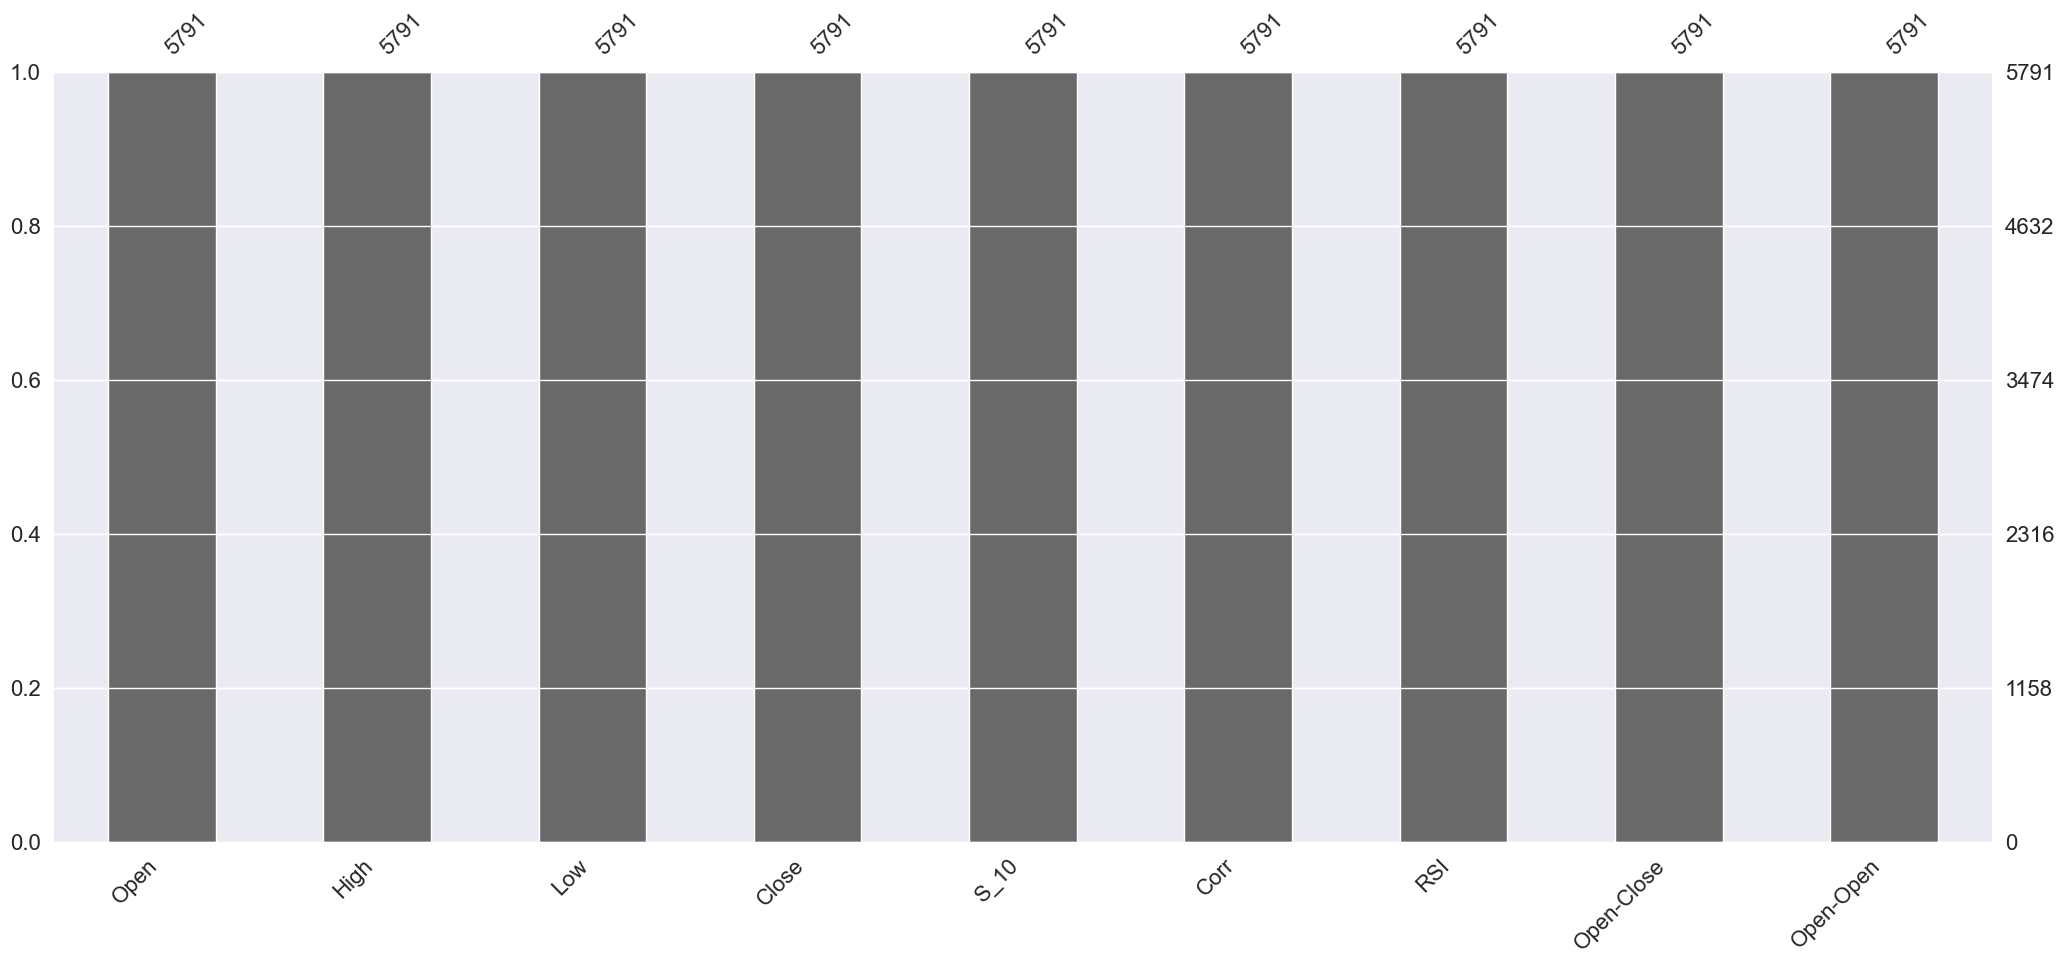

In [63]:
msno.bar(df)

In [64]:
probability = model.predict_proba(X_test)
print(probability)

[[0.47355438 0.52644562]
 [0.57234925 0.42765075]
 [0.53615158 0.46384842]
 ...
 [0.52131203 0.47868797]
 [0.46101154 0.53898846]
 [0.48348897 0.51651103]]


In [65]:

predicted = model.predict(X_test)

In [66]:
def show_confusion_matrix_and_print_accuracy_and_recall(reality, predictions):
    cm = confusion_matrix(reality, predictions)
    sns.heatmap(cm, annot=True, fmt = "d", cmap = "Blues", annot_kws={"size": 50}, cbar = False)
    plt.ylabel('True')
    plt.xlabel('Predicted')
    sns.set(font_scale = 2)
    print(f"Precision: {precision_score(reality, predictions)}")
    print(f"Recall: {recall_score(reality, predictions)}")

Precision: 0.5404290429042904
Recall: 0.7088744588744589


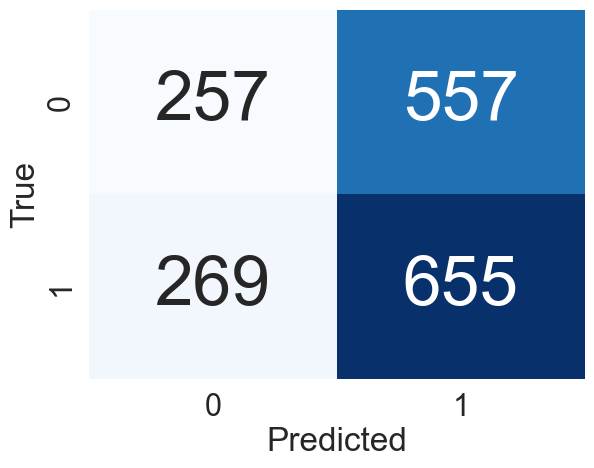

In [67]:
show_confusion_matrix_and_print_accuracy_and_recall(y_test, predicted)

In [68]:
print(metrics.classification_report(y_test, predicted))

              precision    recall  f1-score   support

          -1       0.49      0.32      0.38       814
           1       0.54      0.71      0.61       924

    accuracy                           0.52      1738
   macro avg       0.51      0.51      0.50      1738
weighted avg       0.52      0.52      0.51      1738


In [69]:
print(model.score(X_test,y_test))
0.528

0.5247410817031071


0.528

In [70]:
cross_val = cross_val_score(LogisticRegression(), X, y, scoring='accuracy', cv=10)
print(cross_val)
print(cross_val.mean())

[0.55862069 0.50777202 0.53195164 0.52504318 0.50949914 0.51295337
 0.48186528 0.5164076  0.53367876 0.52331606]
0.5201107736287297


In [71]:
df['Close']

Date
2000-01-28    6375.600098
2000-01-31    6268.500000
2000-02-01    6290.899902
2000-02-02    6302.799805
2000-02-03    6324.299805
                 ...     
2022-12-22    7469.299805
2022-12-23    7473.000000
2022-12-28    7497.200195
2022-12-29    7512.700195
2022-12-30    7451.700195
Name: Close, Length: 5791, dtype: float64

In [72]:
df['Close'].rolling(window=10)

Rolling [window=10,center=False,axis=0,method=single]

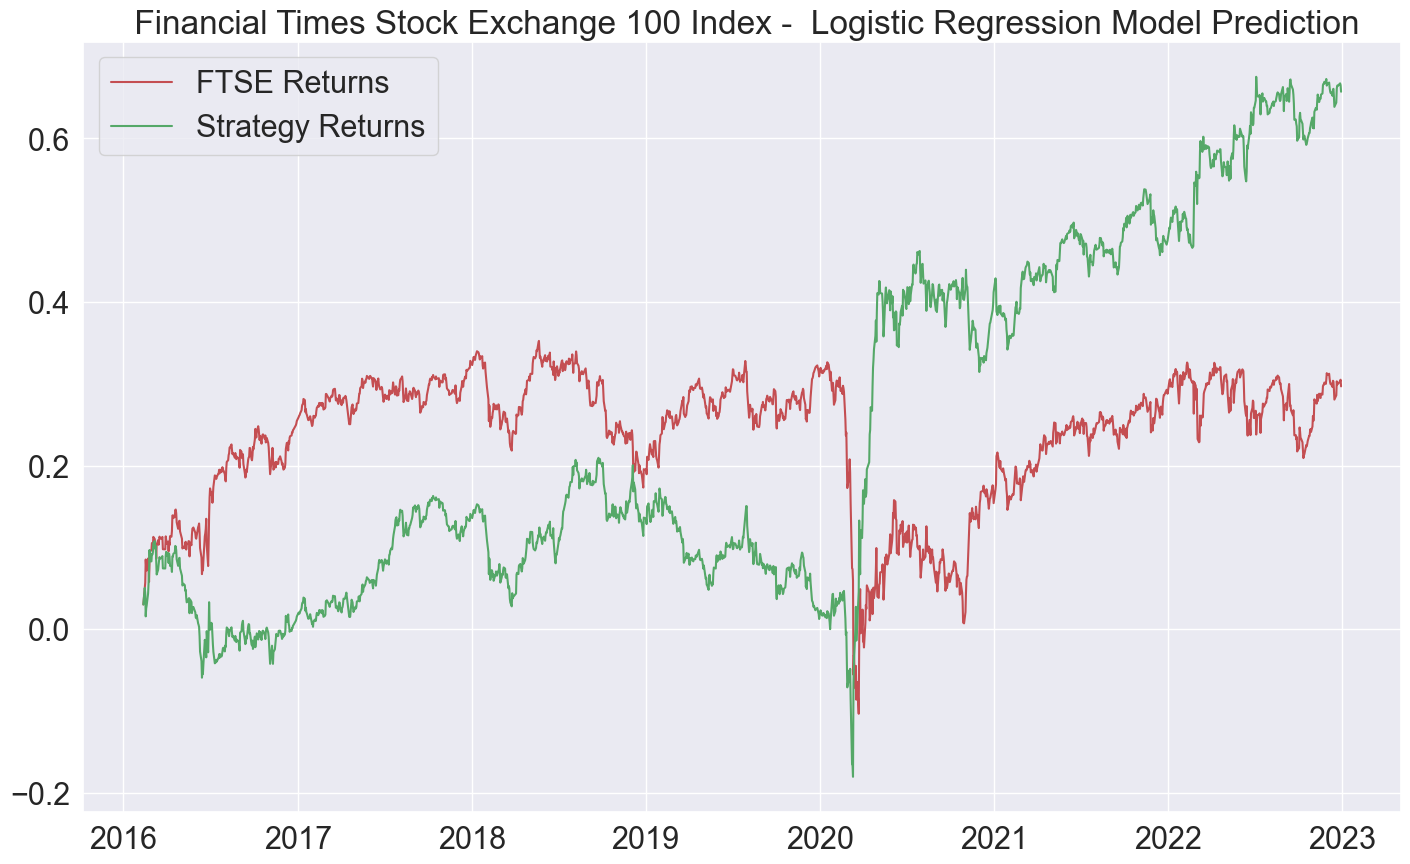

In [78]:
df['Predicted_Signal'] = model.predict(X)
df['Ftse_returns'] = np.log(df['Close']/df['Close'].shift(1))
Cumulative_Ftse_returns = np.cumsum(df[split:]['Ftse_returns'])

df['Startegy_returns'] = df['Ftse_returns']* df['Predicted_Signal'].shift(1)
Cumulative_Strategy_returns = np.cumsum(df[split:]['Startegy_returns'])

plt.figure(figsize=(17,10))
plt.plot(Cumulative_Ftse_returns, color='r',label = 'FTSE Returns')
plt.plot(Cumulative_Strategy_returns, color='g', label = 'Strategy Returns')
plt.title(' Financial Times Stock Exchange 100 Index -  Logistic Regression Model Prediction')
plt.legend()
plt.show()